In [4]:
import numpy as np
import pandas as pd

In [6]:
df= pd.read_csv('Placement.csv')

In [7]:
df

,Student_ID,CGPA,IQ,Placement,unnamed
0,1,6.8,123,1,0
1,2,5.9,106,0,1
2,3,5.3,121,0,2
3,4,7.4,132,1,3
4,5,5.8,142,0,4
...,...,...,...,...,...
95,96,4.3,200,0,95
96,97,4.4,42,0,96
97,98,6.7,182,1,97
98,99,6.3,103,1,98


In [37]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Student_ID  100 non-null    int64  
 1   CGPA        100 non-null    float64
 2   IQ          100 non-null    int64  
 3   Placement   100 non-null    int64  
 4   unnamed     100 non-null    int64  
dtypes: float64(1), int64(4)
memory usage: 4.0 KB


In [38]:
df.iloc[:,1:4]

,CGPA,IQ,Placement
0,6.8,123,1
1,5.9,106,0
2,5.3,121,0
3,7.4,132,1
4,5.8,142,0
...,...,...,...
95,4.3,200,0
96,4.4,42,0
97,6.7,182,1
98,6.3,103,1


In [40]:
import matplotlib.pyplot as plt

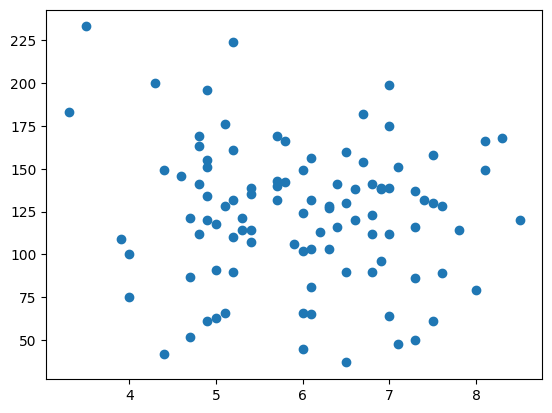

In [43]:
plt.scatter(df['CGPA'],df['IQ'])

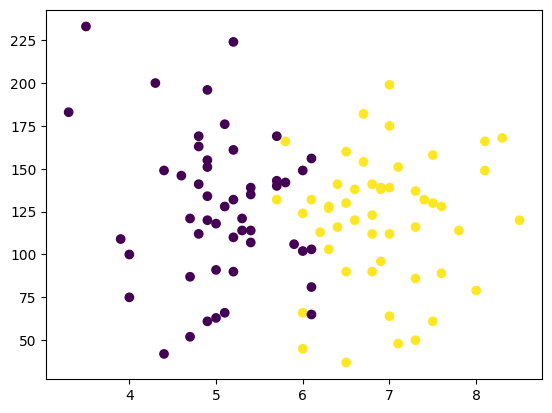

In [51]:
plt.scatter(df['CGPA'],df['IQ'],c=df['Placement'])

In [16]:
X=df.iloc[:,1:3]
Y=df.iloc[:,-2]
Y

0     1
1     0
2     0
3     1
4     0
     ..
95    0
96    0
97    1
98    1
99    1
Name: Placement, Length: 100, dtype: int64

In [22]:
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.1)

In [23]:
X_train

,CGPA,IQ
40,4.9,134
52,7.0,175
58,8.0,79
72,7.3,116
7,5.0,63
...,...,...
55,7.8,114
35,6.8,90
27,6.0,124
17,3.3,183


In [24]:
Y_train

40    0
52    1
58    1
72    1
7     0
     ..
55    1
35    1
27    1
17    0
37    1
Name: Placement, Length: 90, dtype: int64

In [25]:
X_test

,CGPA,IQ
4,5.8,142
94,4.7,52
1,5.9,106
8,6.1,156
67,5.0,118
77,7.3,50
23,4.7,87
75,4.8,169
14,6.1,103
13,6.4,116


In [32]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

In [35]:
X_train = scaler.fit_transform(X_train)

In [37]:
X_train

array([[-0.96796257,  0.22437759],
       [ 0.83800906,  1.25802717],
       [ 1.69799555, -1.1622255 ],
       [ 1.096005  , -0.22941978],
       [-0.88196392, -1.56560095],
       [-0.96796257,  0.75380786],
       [ 0.75201041,  0.35043242],
       [ 0.83800906,  0.35043242],
       [ 1.18200365,  0.17395566],
       [ 0.15001987, -0.30505268],
       [ 0.06402122, -1.51517901],
       [-0.27997338,  0.45127628],
       [ 0.40801581, -2.22108604],
       [ 0.83800906, -0.33026365],
       [ 2.12798879, -0.12857592],
       [-1.22595852,  0.52690917],
       [-0.02197743, -0.5823733 ],
       [ 1.2680023 ,  0.82944076],
       [ 1.096005  , -0.98574874],
       [-0.70996662,  0.90507365],
       [ 0.49401446, -0.12857592],
       [ 1.096005  ,  0.30001049],
       [ 0.92400771,  0.652964  ],
       [ 0.58001311,  1.43450393],
       [ 1.95599149,  1.08155041],
       [-1.05396122, -0.33026365],
       [-0.27997338,  0.37564338],
       [-0.96796257, -1.61602288],
       [ 0.75201041,

In [43]:
X_test = scaler.transform(X_test)
X_test

array([[  5.8, 142. ],
       [  4.7,  52. ],
       [  5.9, 106. ],
       [  6.1, 156. ],
       [  5. , 118. ],
       [  7.3,  50. ],
       [  4.7,  87. ],
       [  4.8, 169. ],
       [  6.1, 103. ],
       [  6.4, 116. ]])

In [45]:
from sklearn.linear_model import LogisticRegression


In [46]:
clf=LogisticRegression()

In [50]:
clf.fit(X_train,Y_train) #modeltrain

LogisticRegression()

In [54]:
Y_predict=clf.predict(X_test)

In [55]:
Y_test

4     0
94    0
1     0
8     0
67    0
77    1
23    0
75    0
14    0
13    1
Name: Placement, dtype: int64

In [58]:
from sklearn.metrics import accuracy_score
accuracy_score(Y_test,Y_predict)

0.2

<Axes: >

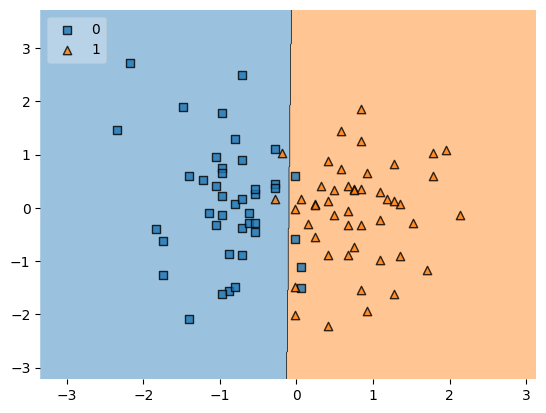

In [60]:
from mlxtend.plotting import plot_decision_regions
plot_decision_regions(X_train, Y_train.values, clf=clf, legend=2)